In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Import Bagging Classifier.
from sklearn.ensemble import BaggingClassifier

In [ ]:
pima=pd.read_csv("/content/diabetes.csv")

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.shape

(768, 9)

In [ ]:
##   cleaning and model prepration

In [ ]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima = pd.get_dummies(
                    pima,
                    columns = ['DiabetesPedigreeFunction','BMI' ],
                    drop_first = True
)

In [ ]:
pima.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

# Define X and y.
X = pima.drop("Outcome",axis="columns")
y = pima["Outcome"]

In [ ]:
# Split data into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                random_state = 42,
                                                stratify = y)

In [ ]:
X_train.shape

(576, 769)

In [ ]:
X_test.shape

(192, 769)

In [ ]:
y_train.value_counts()      ###[0] means no diebetes and [1] means diebetes affected persons.

0    375
1    201
Name: Outcome, dtype: int64

In [ ]:
# What is the accuracy of our baseline model?
y.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# Instantiate `DecisionTreeClassifier` object.
tree = DecisionTreeClassifier (random_state = 42)

In [ ]:
# Fit and score on the training data.
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Score on the testing data.
tree.score(X_train, y_train)

1.0

In [ ]:
tree.score(X_test, y_test)

0.7083333333333334

In [ ]:
# Generate one bootstrapped sample
# of size n from X_train.

X_train.sample(n= X_train.shape[0],
                  replace = True,
              random_state = 42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,DiabetesPedigreeFunction_0.084,DiabetesPedigreeFunction_0.085,DiabetesPedigreeFunction_0.088,DiabetesPedigreeFunction_0.089,...,BMI_49.6,BMI_49.7,BMI_50.0,BMI_52.3,BMI_52.9,BMI_53.2,BMI_55.0,BMI_57.3,BMI_59.4,BMI_67.1
523,9,130,70,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,1,0,68,35,0,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,1,81,72,18,40,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,10,179,70,0,0,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,5,115,98,0,0,28,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,5,115,76,0,0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,2,85,65,0,0,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,5,116,74,29,0,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,71,48,18,76,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

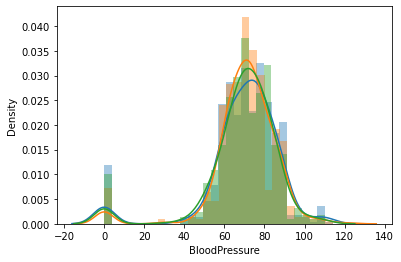

In [ ]:
# Create bootstrapped samples
# & plot cholesterol level for each bootstrapped sample.
for i in range(3):
    sns.distplot(X_train.sample(n = X_train.shape[0], replace = True)['BloodPressure']);

In [ ]:
#Introduction to Ensemble Methods

In [ ]:
#Ensemble models
#We can use the "wisdom of the crowd" idea by creating several models and then aggregating their results in some way.

#Types of ensemble models:

#Bagging
#Boosting
#Stacking

In [ ]:
##Bagging Classifier using a for loop
pd.DataFrame(index = X_test.index)

""
635
698
637
402
425
...
62
477
311
116


In [ ]:
# Instantiate dataframe.
predections = pd.DataFrame(index = X_test.index)
# Generate ten decision trees.
for i in range (1,11):

    # Bootstrap X data.
    # Should we add a random seed?
    X_sample = X_train.sample( n = X_train.shape[0],
                             replace = True)

    # Get y data that matches the X data.
    y_sample = y_train[X_sample.index]

    # Instantiate decision tree.
    t = DecisionTreeClassifier()

    # Fit to our sample data.
    t.fit(X_sample, y_sample)

    # Put predictions in dataframe.
    predections[f'Tree {i}'] = t.predict(X_test)

In [ ]:
predections.head()

,Tree 1,Tree 2,Tree 3,Tree 4,Tree 5,Tree 6,Tree 7,Tree 8,Tree 9,Tree 10
635,0,0,0,1,0,1,0,1,0,0
698,0,1,0,0,0,0,0,0,0,0
637,0,0,0,0,0,0,0,0,0,0
402,1,1,1,0,0,1,0,1,1,1
425,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Generate aggregated predicted probabilities.
probs = predections.mean(axis = 'columns')

In [ ]:
# What's our accuracy?
accuracy_score(y_test,(probs >.5).astype(int))

0.703125

In [ ]:
######            Bagging Classifier using sklearn
#BaggingClassifier Documentation

#In the cell below, create and score instance of BaggingClassifier on the test set

In [ ]:
# Instantiate BaggingClassifier.
bag = BaggingClassifier(random_state = 42)


# Fit BaggingClassifier.

bag.fit(X_train,y_train)

# Score BaggingClassifier.

BaggingClassifier(random_state=42)

In [ ]:
bag.score(X_test,y_test)

0.6979166666666666

In [ ]:
bag.score(X_train,y_train)

0.9809027777777778

In [ ]:
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
rg = RandomForestClassifier()

In [ ]:
rg.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rg.score(X_test,y_test)

0.7239583333333334

In [ ]:
rg.score(X_train,y_train)

1.0

In [ ]:
rg_params = {
    'n_estimators': [100,150,200],
    'max_depth': [None,1,2,3,4,5]
}

In [ ]:
gs = GridSearchCV(rg, param_grid = rg_params, cv = 5)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [ ]:
print(gs.best_score_)

0.7604947526236882


In [ ]:
gs.score(X_test,y_test)

0.71875

In [ ]:
gs.score(X_train,y_train)

1.0

In [ ]:
gs.best_params_

{'max_depth': None, 'n_estimators': 200}